In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

from holodecml.data import load_raw_datasets, get_linspace


In [2]:
path_data = "/glade/p/cisl/aiml/ai4ess_hackathon/holodec/"
num_particles = "medium"
output_cols = ["x", "y", "z", "d", "hid"]
subset = False
scaler_out = MinMaxScaler()


In [3]:
train_inputs,\
train_outputs = load_raw_datasets(path_data, num_particles, 'train',
                                  output_cols, subset)
# valid_inputs,\
# valid_outputs = load_raw_datasets(path_data, num_particles, 'valid',
#                                   output_cols, subset)

In [4]:
train_outputs["z"]

particle
0           18706.232422
1          124515.554688
2           42935.140625
3          107522.531250
4           46511.492188
               ...      
1478993    101693.742188
1478994     56084.054688
1478995     32169.593750
1478996     23816.279297
1478997     89869.617188
Name: z, Length: 1478998, dtype: float32

In [5]:
x_linspace, y_linspace = get_linspace(train_inputs[0].shape)
train_outputs["x_bin"] = np.digitize(train_outputs['x'], x_linspace)
train_outputs["y_bin"] = np.digitize(train_outputs['y'], y_linspace)

In [6]:
train_outputs["x_bin"]

particle
0          494
1           75
2          331
3          477
4          583
          ... 
1478993    415
1478994     16
1478995    409
1478996    306
1478997     38
Name: x_bin, Length: 1478998, dtype: int64

In [7]:
for hid in train_outputs["hid"].unique().astype(int):
    outputs_hid = train_outputs.loc[train_outputs['hid'] == hid]
    hologram = train_inputs[hid-1]
    z_pixel_value = hologram[outputs_hid["x_bin"], outputs_hid["y_bin"]]
    train_outputs.loc[train_outputs['hid'] == hid, "z_pixel_value"] = z_pixel_value


In [8]:
train_outputs

,x,y,z,d,hid,x_bin,y_bin,z_pixel_value
particle,,,,,,,,
0,574.064636,-406.768372,18706.232422,18.144970,1.0,494,63,104.0
1,-668.388184,466.142151,124515.554688,19.381775,1.0,75,357,127.0
2,92.994080,128.131302,42935.140625,29.533314,1.0,331,243,113.0
3,526.069153,-224.790375,107522.531250,44.516953,1.0,477,124,133.0
4,839.312927,-63.917049,46511.492188,50.600452,1.0,583,178,144.0
...,...,...,...,...,...,...,...,...
1478993,341.269043,55.084465,101693.742188,47.653740,80000.0,415,219,126.0
1478994,-841.722046,-241.848877,56084.054688,24.521036,80000.0,16,118,120.0
1478995,322.008453,-338.126190,32169.593750,45.862312,80000.0,409,86,125.0


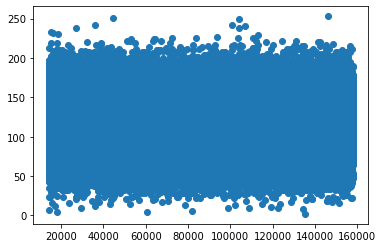

-4.269539303808938


In [9]:
plt.scatter(train_outputs["z"], train_outputs["z_pixel_value"])
print(r2_score(train_outputs["z"], train_outputs["z_pixel_value"]))
plt.show()
